In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("togo-dapaong_qc.csv")
dataset.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [2]:
print("\n--- Step 1: Data Type Conversion ---")
# Convert 'Timestamp' column to datetime objects
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])
print("Timestamp column converted to datetime.")
print(dataset.info())


--- Step 1: Data Type Conversion ---
Timestamp column converted to datetime.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-

In [3]:
print("\n--- Step 2: Summary Statistics & Missing-Value Report ---")
print("\nSummary Statistics for Numeric Columns:")
print(dataset.describe())

print("\nMissing Value Report (Count of NaNs per column):")
missing_values_count = dataset.isna().sum()
print(missing_values_count)

total_rows = len(dataset)
print("\nColumns with >5% Null Values:")
high_null_columns = []
for col, count in missing_values_count.items():
    null_percentage = (count / total_rows) * 100
    if null_percentage > 5:
        print(f"  - {col}: {null_percentage:.2f}% nulls")
        high_null_columns.append(col)
if not high_null_columns:
    print("  No columns found with more than 5% null values.")


--- Step 2: Summary Statistics & Missing-Value Report ---

Summary Statistics for Numeric Columns:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-25 12:00:30.000000768     230.555040     151.258469   
min              2021-10-25 00:01:00     -12.700000       0.000000   
25%              2022-01-24 06:00:45      -2.200000       0.000000   
50%              2022-04-25 12:00:30       2.100000       0.000000   
75%              2022-07-25 18:00:15     442.400000     246.400000   
max              2022-10-25 00:00:00    1424.000000    1004.500000   
std                              NaN     322.532347     250.956962   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.444352     226.144375     219.568588      27.751788   
min         0.000000       0.000000       0.000000      14.900


--- Step 3: Outlier Detection & Basic Cleaning ---

Generating Boxplots for Key Variables...


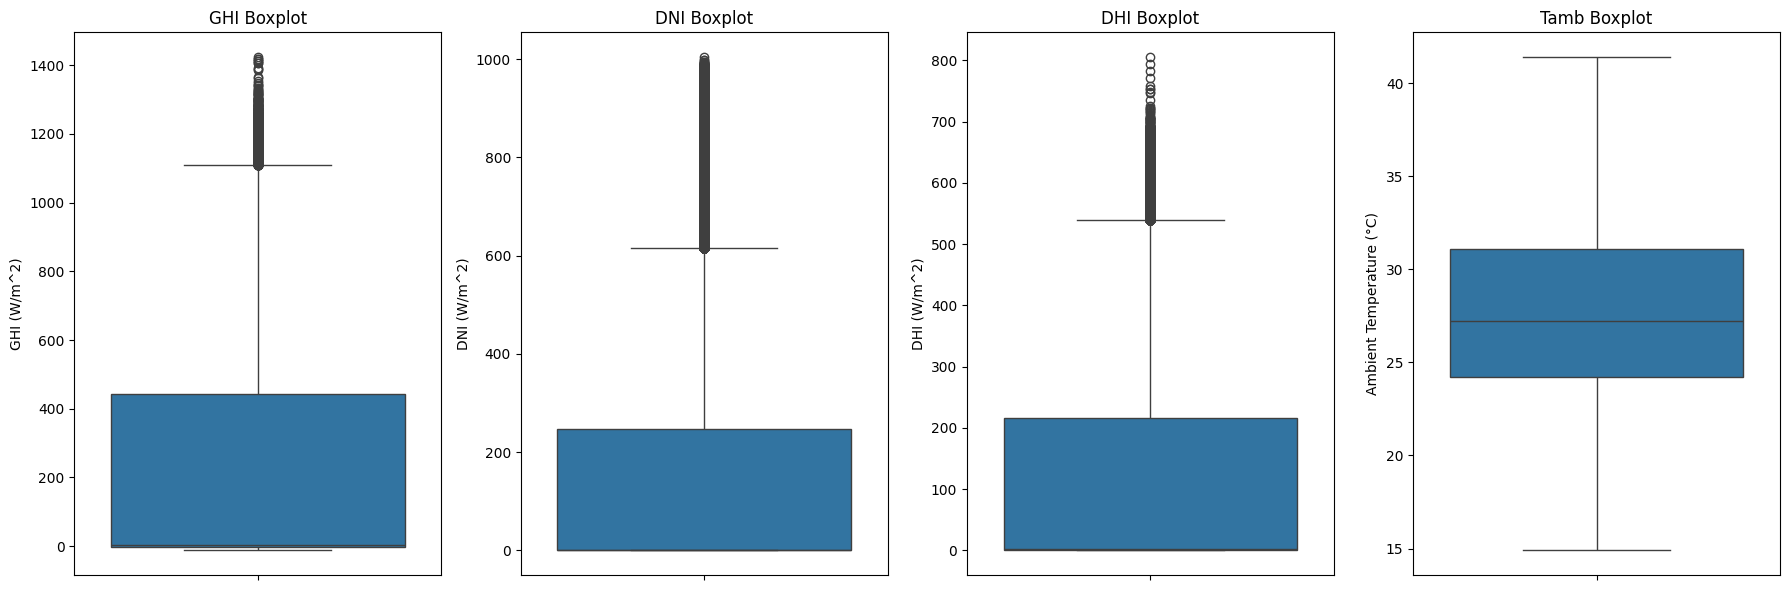

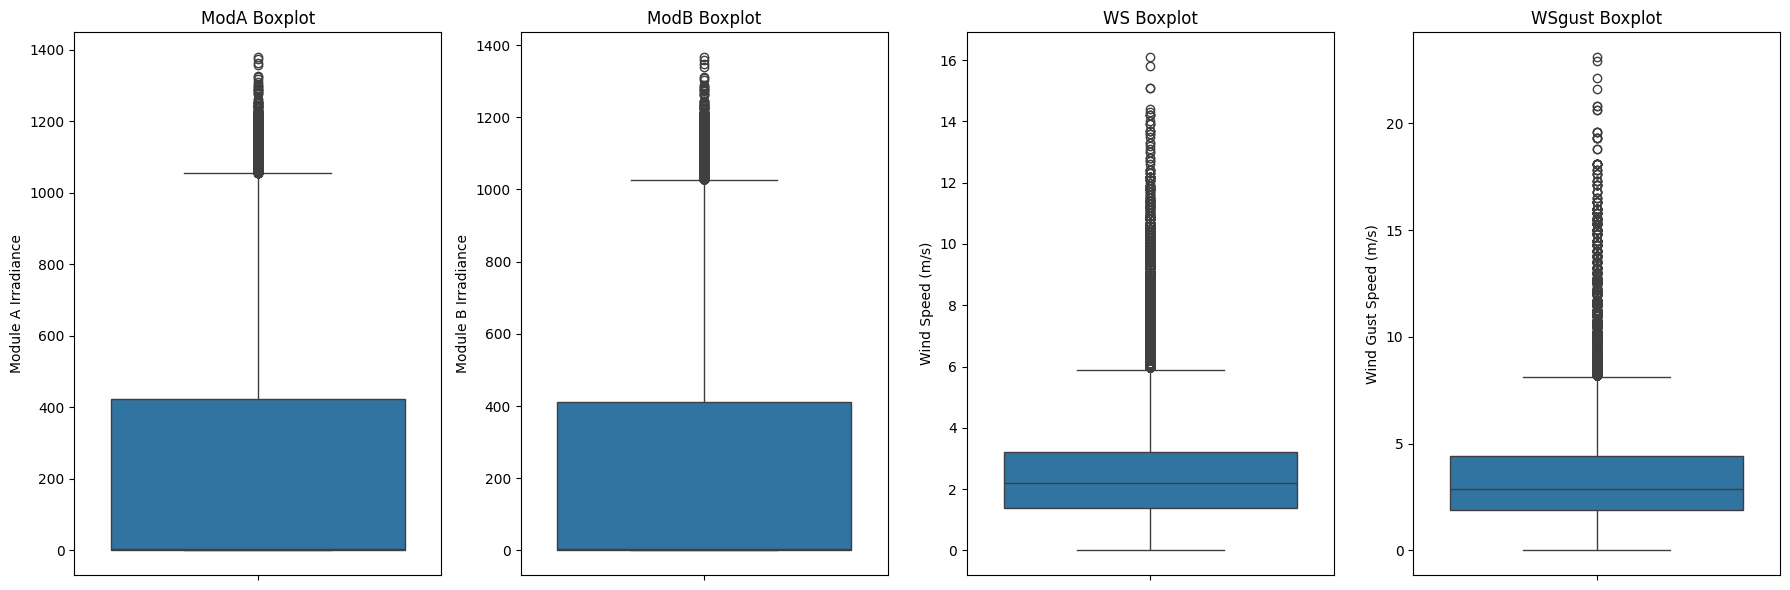

In [4]:
print("\n--- Step 3: Outlier Detection & Basic Cleaning ---")

# --- Boxplots for Outlier Visualization ---
print("\nGenerating Boxplots for Key Variables...")
plt.figure(figsize=(18, 6)) # Increased figure size to accommodate more plots

plt.subplot(1, 4, 1)
sns.boxplot(y=dataset['GHI'])
plt.title('GHI Boxplot')
plt.ylabel('GHI (W/m^2)')

plt.subplot(1, 4, 2)
sns.boxplot(y=dataset['DNI'])
plt.title('DNI Boxplot')
plt.ylabel('DNI (W/m^2)')

plt.subplot(1, 4, 3)
sns.boxplot(y=dataset['DHI'])
plt.title('DHI Boxplot')
plt.ylabel('DHI (W/m^2)')

plt.subplot(1, 4, 4)
sns.boxplot(y=dataset['Tamb']) # Add Tamb for temperature outliers
plt.title('Tamb Boxplot')
plt.ylabel('Ambient Temperature (°C)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 6)) # New figure for the rest

plt.subplot(1, 4, 1)
sns.boxplot(y=dataset['ModA'])
plt.title('ModA Boxplot')
plt.ylabel('Module A Irradiance')

plt.subplot(1, 4, 2)
sns.boxplot(y=dataset['ModB'])
plt.title('ModB Boxplot')
plt.ylabel('Module B Irradiance')

plt.subplot(1, 4, 3)
sns.boxplot(y=dataset['WS'])
plt.title('WS Boxplot')
plt.ylabel('Wind Speed (m/s)')

plt.subplot(1, 4, 4)
sns.boxplot(y=dataset['WSgust'])
plt.title('WSgust Boxplot')
plt.ylabel('Wind Gust Speed (m/s)')
plt.tight_layout()
plt.show()


   



In [5]:
print("\nComputing Z-scores and flagging outliers (|Z| > 3)...")
def calculate_z_score(df_local, col): # Renamed df to df_local to avoid confusion
    if col in df_local.columns:
        mean = df_local[col].mean()
        std = df_local[col].std()
        if std == 0: # Handle cases where std dev is zero (e.g., all values are same)
            df_local[f'{col}_Z'] = 0
        else:
            df_local[f'{col}_Z'] = (df_local[col] - mean) / std
    return df_local

columns_for_zscore = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Tamb']
for col in columns_for_zscore:
    dataset = calculate_z_score(dataset, col)

outlier_threshold = 3
outlier_flags = pd.DataFrame(index=dataset.index) # DataFrame to hold boolean flags
for col in columns_for_zscore:
    z_col_name = f'{col}_Z'
    if z_col_name in dataset.columns:
        outlier_flags[f'is_outlier_{col}'] = dataset[z_col_name].abs() > outlier_threshold
    else:
        print(f"Warning: Z-score column '{z_col_name}' not found for {col}. Skipping outlier flag for this column.")


Computing Z-scores and flagging outliers (|Z| > 3)...


In [7]:
total_outlier_rows = outlier_flags.any(axis=1)
num_outlier_rows = total_outlier_rows.sum()

print(f"Number of rows with at least one variable having |Z| > {outlier_threshold}: {num_outlier_rows}")
if num_outlier_rows > 0:
    print("First 5 rows flagged as potential outliers:")
    print(dataset[total_outlier_rows].head())
else:
    print("No rows flagged as potential outliers based on the Z-score threshold.")


Number of rows with at least one variable having |Z| > 3: 9251
First 5 rows flagged as potential outliers:
               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
4985 2021-10-28 11:06:00  1139.0  805.1  466.1  1172.0  1154.0  29.8  70.8   
5410 2021-10-28 18:11:00    -1.2    0.0    0.0     0.0     0.0  29.7  63.5   
5411 2021-10-28 18:12:00    -1.0    0.0    0.0     0.0     0.0  29.3  62.4   
5413 2021-10-28 18:14:00    -0.8    0.0    0.0     0.0     0.0  28.6  63.7   
5420 2021-10-28 18:21:00    -1.3    0.0    0.0     0.0     0.0  27.7  64.5   

       WS  WSgust  ...  TModB  Comments     GHI_Z     DNI_Z     DHI_Z  \
4985  2.2     2.6  ...   50.2       NaN  2.816601  2.605393  2.233926   
5410  6.6     9.7  ...   29.5       NaN -0.718548 -0.602727 -0.743955   
5411  6.9     8.9  ...   29.5       NaN -0.717928 -0.602727 -0.743955   
5413  7.1     8.9  ...   29.2       NaN -0.717308 -0.602727 -0.743955   
5420  6.1     8.9  ...   28.2       NaN -0.718858 -0.602727

In [8]:
# --- Missing Value Imputation ---
print("\nImputing missing values in key columns (GHI, DNI, DHI, Tamb, ModA, ModB, WS, WSgust) with median...")
for col in ['GHI', 'DNI', 'DHI', 'Tamb', 'ModA', 'ModB', 'WS', 'WSgust']:
    if col in dataset.columns and dataset[col].isna().any(): # Check if column exists and has NaNs
        median_val = dataset[col].median()
        dataset[col].fillna(median_val, inplace=True)
        print(f"  - Imputed '{col}' with median value: {median_val}")
    elif col in dataset.columns:
        print(f"  - '{col}' has no missing values or is not numeric, skipping imputation.")
    else:
        print(f"  - Warning: Column '{col}' not found in dataset for imputation.")

print("\nMissing values after imputation:")
print(dataset[['GHI', 'DNI', 'DHI', 'Tamb', 'ModA', 'ModB', 'WS', 'WSgust']].isna().sum())



Imputing missing values in key columns (GHI, DNI, DHI, Tamb, ModA, ModB, WS, WSgust) with median...
  - 'GHI' has no missing values or is not numeric, skipping imputation.
  - 'DNI' has no missing values or is not numeric, skipping imputation.
  - 'DHI' has no missing values or is not numeric, skipping imputation.
  - 'Tamb' has no missing values or is not numeric, skipping imputation.
  - 'ModA' has no missing values or is not numeric, skipping imputation.
  - 'ModB' has no missing values or is not numeric, skipping imputation.
  - 'WS' has no missing values or is not numeric, skipping imputation.
  - 'WSgust' has no missing values or is not numeric, skipping imputation.

Missing values after imputation:
GHI       0
DNI       0
DHI       0
Tamb      0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [10]:
# --- Export Cleaned DataFrame ---
cleaned_data_path = '../data/togo_clean.csv' 
dataset.to_csv(cleaned_data_path, index=False)
print(f"\nCleaned DataFrame exported to: {cleaned_data_path}")



Cleaned DataFrame exported to: ../data/togo_clean.csv



--- Step 4: Time Series Analysis ---


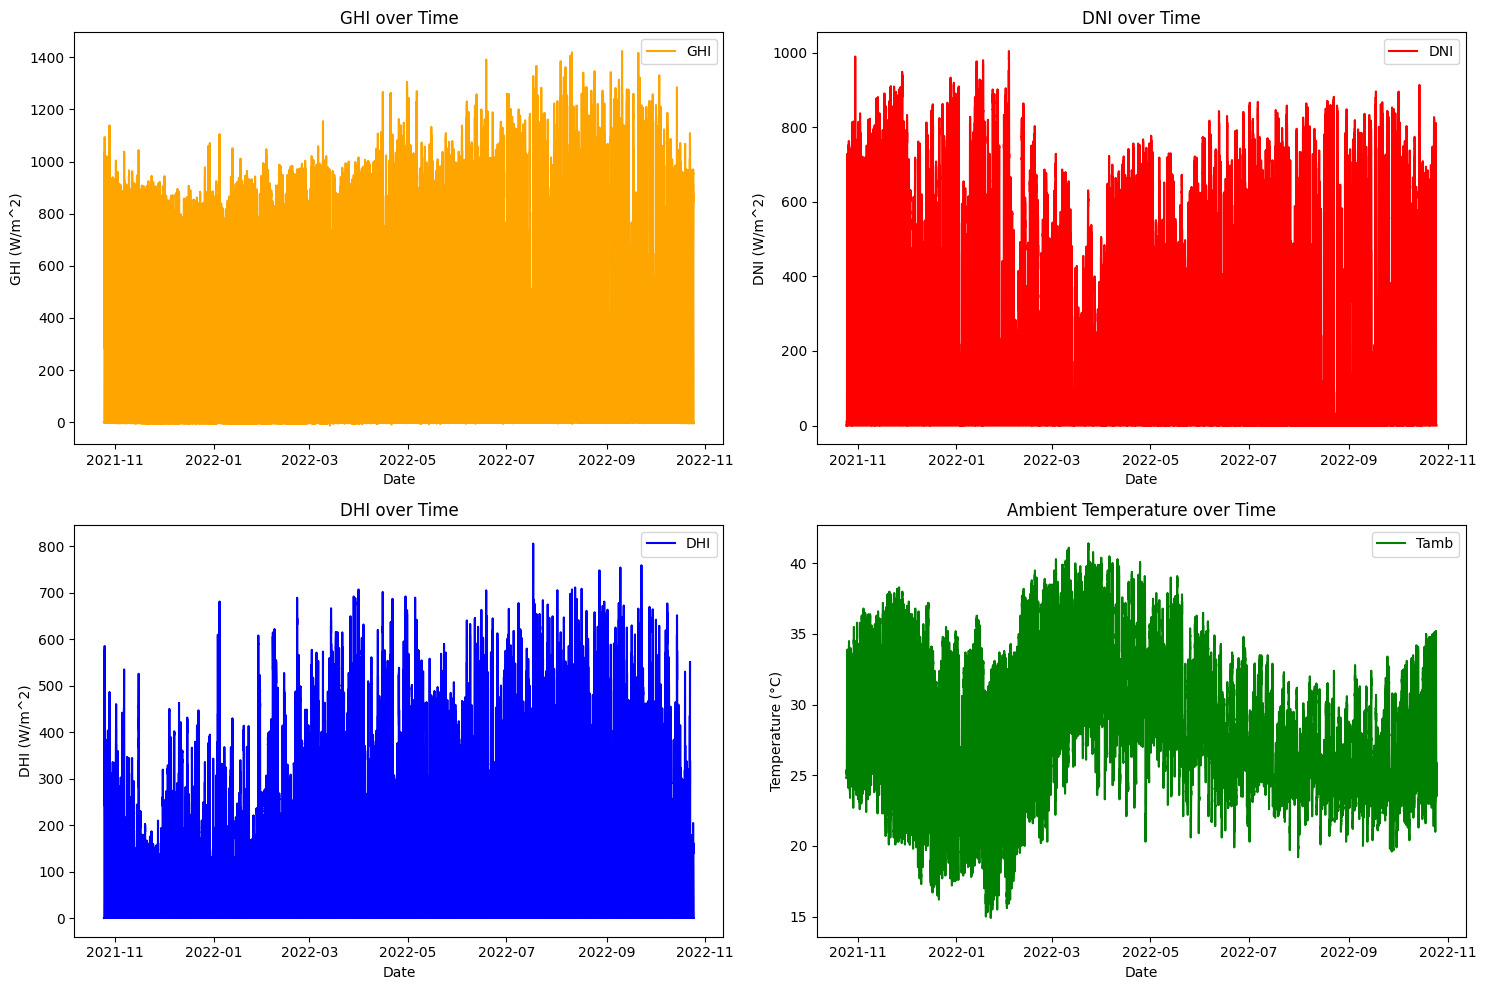


Monthly Average Solar Irradiance and Temperature:
              GHI         DNI         DHI       Tamb
Month                                               
1      238.426918  219.422166   90.369834  25.132681
2      257.658819  172.229457  131.359266  28.268621
3      252.169276  114.931635  157.590645  32.511519
4      252.307278  143.576257  131.567965  30.888090
5      238.432717  129.297993  128.203943  29.719371
6      237.576118  133.510521  124.700926  27.732884
7      203.113380   94.875930  124.710381  26.264928
8      189.017236   81.059830  123.404628  25.294935
9      177.739558   83.204699  111.767359  24.970475
10     245.758793  177.941514  109.592782  27.142251
11     245.349884  253.428850   75.008317  28.900421
12     231.435146  213.932435   89.766243  26.293190


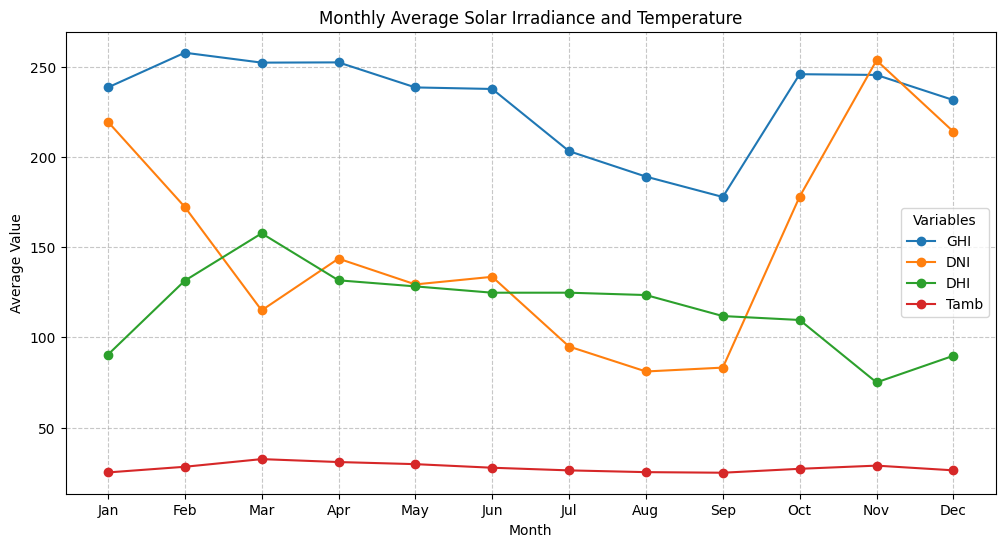


Hourly Average Solar Irradiance and Temperature:
             GHI         DNI         DHI       Tamb
Hour                                               
0      -2.264968    0.000000    0.000000  24.976037
1      -2.174954    0.000000    0.000000  24.519498
2      -2.112836    0.000000    0.000000  24.169402
3      -2.120370    0.000000    0.000000  23.758840
4      -2.082365    0.000000    0.000000  23.394205
5      -0.457525    0.300146    1.128315  23.113119
6      53.039018   42.047489   43.532808  23.170648
7     211.594511  181.295352  137.776311  24.633621
8     409.281333  307.181324  223.985174  26.666461
9     589.945005  390.403881  291.282027  28.452598
10    717.561895  434.611621  335.921406  29.937658
11    783.734164  450.521877  361.833708  31.197215
12    779.221680  452.080320  354.978356  32.137306
13    719.238416  436.553849  334.519977  32.830178
14    603.526511  401.916918  293.618037  33.254201
15    420.818068  313.474553  228.199324  33.203146
16    216.1988

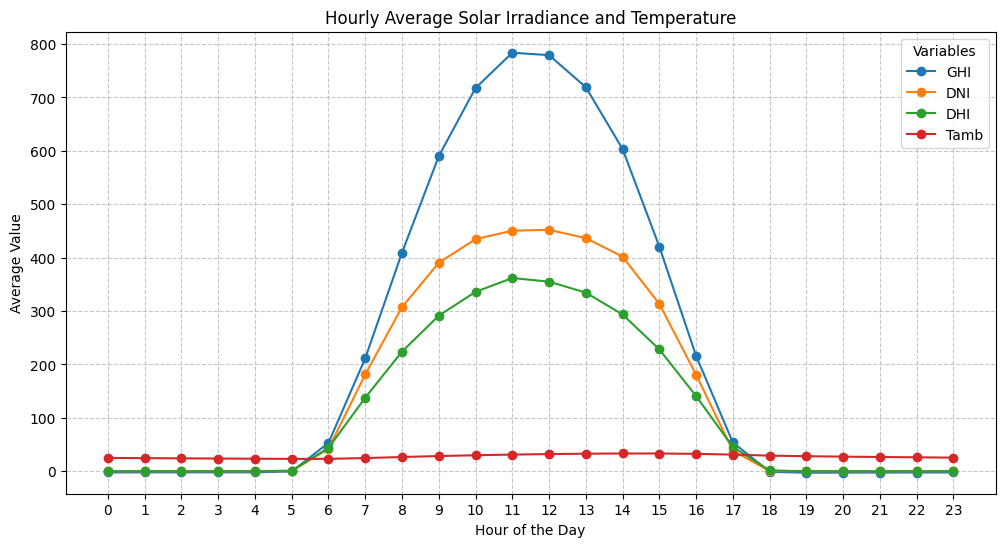

In [11]:
print("\n--- Step 4: Time Series Analysis ---")
# Ensure Timestamp is datetime, done in Step 1, but good to re-check if running cells out of order
if not pd.api.types.is_datetime64_any_dtype(dataset['Timestamp']):
    dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(dataset['Timestamp'], dataset['GHI'], label='GHI', color='orange')
plt.title('GHI over Time')
plt.xlabel('Date')
plt.ylabel('GHI (W/m^2)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(dataset['Timestamp'], dataset['DNI'], label='DNI', color='red')
plt.title('DNI over Time')
plt.xlabel('Date')
plt.ylabel('DNI (W/m^2)')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(dataset['Timestamp'], dataset['DHI'], label='DHI', color='blue')
plt.title('DHI over Time')
plt.xlabel('Date')
plt.ylabel('DHI (W/m^2)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(dataset['Timestamp'], dataset['Tamb'], label='Tamb', color='green')
plt.title('Ambient Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.tight_layout()
plt.show()

# Observe patterns by month
dataset['Month'] = dataset['Timestamp'].dt.month
monthly_avg = dataset.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
print("\nMonthly Average Solar Irradiance and Temperature:")
print(monthly_avg)
monthly_avg.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Monthly Average Solar Irradiance and Temperature')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Variables')
plt.show()

# Observe trends throughout day
dataset['Hour'] = dataset['Timestamp'].dt.hour
hourly_avg = dataset.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
print("\nHourly Average Solar Irradiance and Temperature:")
print(hourly_avg)
hourly_avg.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Hourly Average Solar Irradiance and Temperature')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Value')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Variables')
plt.show()


--- Step 5: Cleaning Impact Analysis ---
Average ModA & ModB Readings by Cleaning Flag:
                ModA        ModB
Cleaning                        
0         225.979064  219.401351
1         535.186477  532.211744


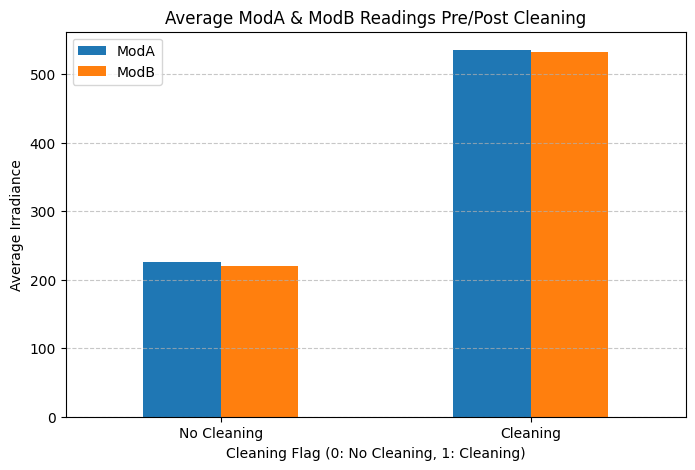

In [12]:
print("\n--- Step 5: Cleaning Impact Analysis ---")
if 'Cleaning' in dataset.columns and 'ModA' in dataset.columns and 'ModB' in dataset.columns:
    cleaning_impact = dataset.groupby('Cleaning')[['ModA', 'ModB']].mean()
    print("Average ModA & ModB Readings by Cleaning Flag:")
    print(cleaning_impact)

    cleaning_impact.plot(kind='bar', figsize=(8, 5))
    plt.title('Average ModA & ModB Readings Pre/Post Cleaning')
    plt.ylabel('Average Irradiance')
    plt.xlabel('Cleaning Flag (0: No Cleaning, 1: Cleaning)')
    plt.xticks(ticks=[0, 1], labels=['No Cleaning', 'Cleaning'], rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Columns 'Cleaning', 'ModA', or 'ModB' not found in dataset. Skipping Cleaning Impact analysis.")
    print("Please ensure your dataset contains a 'Cleaning' flag and 'ModA', 'ModB' columns for this analysis.")


--- Step 6: Correlation & Relationship Analysis ---

Generating Correlation Heatmap...


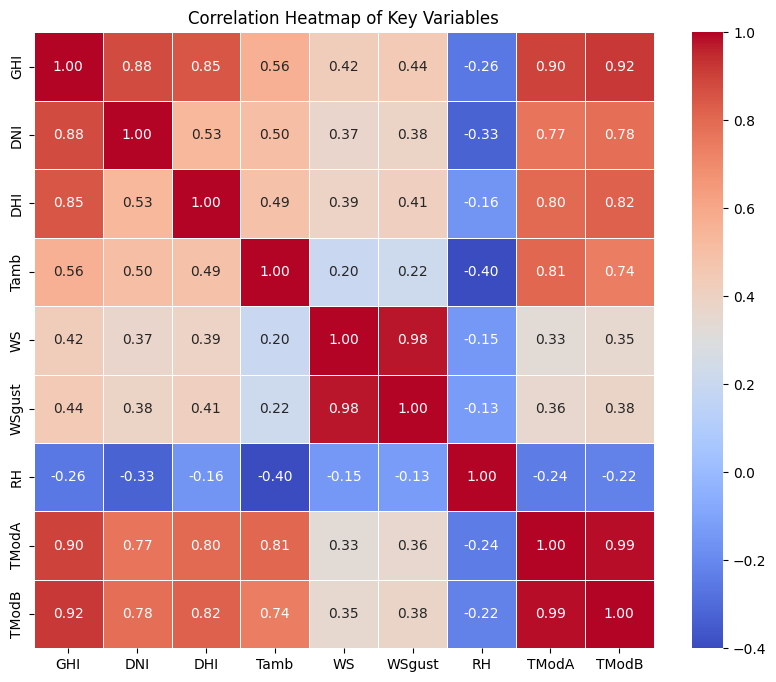


Generating Scatter Plots for Relationships...


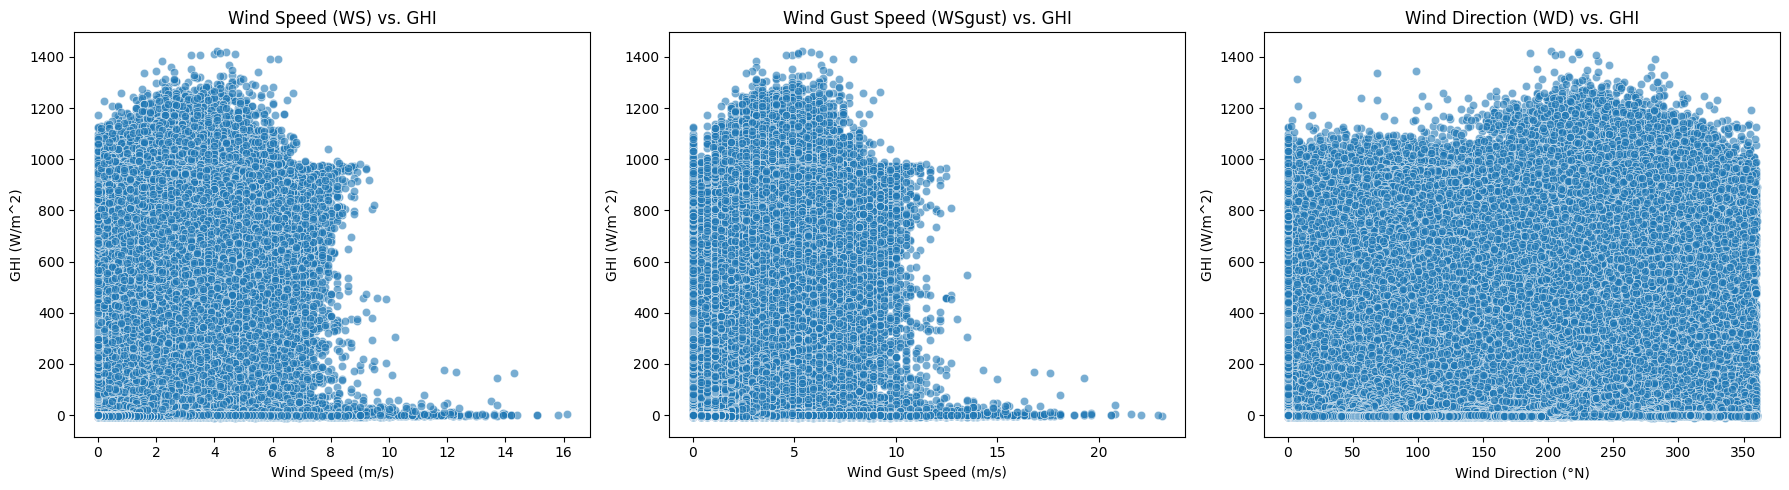

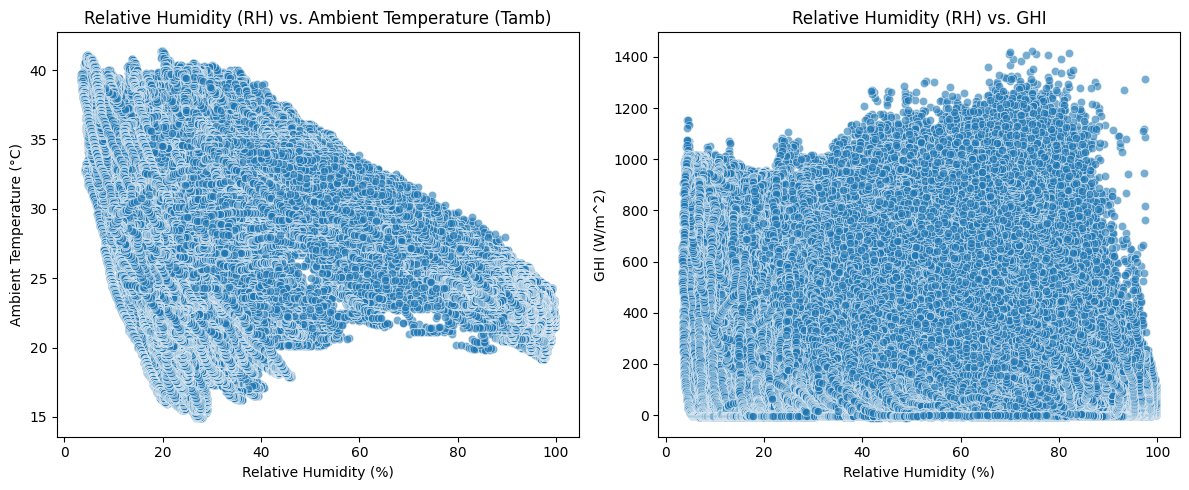

In [13]:
print("\n--- Step 6: Correlation & Relationship Analysis ---")

# --- Heatmap of Correlations ---
print("\nGenerating Correlation Heatmap...")
# Ensure TModA and TModB columns exist before including in correlation
correlation_cols = ['GHI', 'DNI', 'DHI', 'Tamb', 'WS', 'WSgust', 'RH'] # Base columns
if 'TModA' in dataset.columns:
    correlation_cols.append('TModA')
if 'TModB' in dataset.columns:
    correlation_cols.append('TModB')

# Filter dataset to only include existing correlation columns
filtered_dataset = dataset[correlation_cols]

correlation_matrix = filtered_dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Key Variables')
plt.show()

# --- Scatter Plots for Relationships ---
print("\nGenerating Scatter Plots for Relationships...")
plt.figure(figsize=(18, 5)) # Use a larger figure for 3 subplots

plt.subplot(1, 3, 1)
sns.scatterplot(x='WS', y='GHI', data=dataset, alpha=0.6)
plt.title('Wind Speed (WS) vs. GHI')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m^2)')

plt.subplot(1, 3, 2)
sns.scatterplot(x='WSgust', y='GHI', data=dataset, alpha=0.6)
plt.title('Wind Gust Speed (WSgust) vs. GHI')
plt.xlabel('Wind Gust Speed (m/s)')
plt.ylabel('GHI (W/m^2)')

plt.subplot(1, 3, 3)
if 'WD' in dataset.columns:
    sns.scatterplot(x='WD', y='GHI', data=dataset, alpha=0.6)
    plt.title('Wind Direction (WD) vs. GHI')
    plt.xlabel('Wind Direction (°N)')
    plt.ylabel('GHI (W/m^2)')
else:
    plt.title('Wind Direction (WD) vs. GHI (WD column missing)')
    plt.text(0.5, 0.5, 'WD column not found', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5)) # New figure for RH plots

plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=dataset, alpha=0.6)
plt.title('Relative Humidity (RH) vs. Ambient Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=dataset, alpha=0.6)
plt.title('Relative Humidity (RH) vs. GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m^2)')
plt.tight_layout()
plt.show()


--- Step 7: Wind & Distribution Analysis ---

Generating Histograms for GHI and WS...


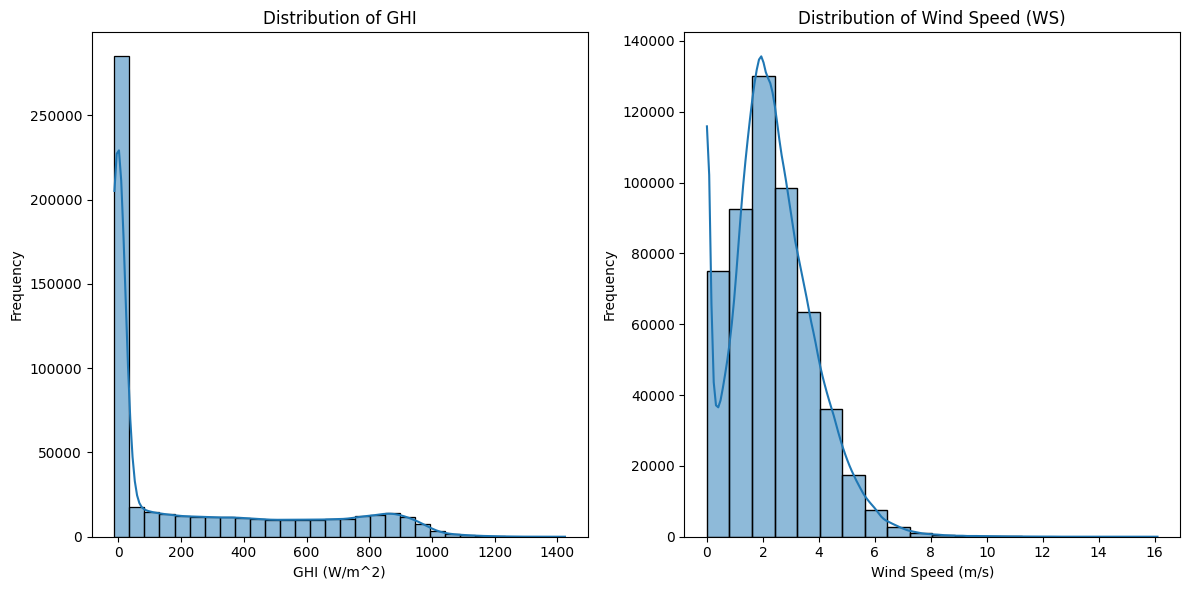


Generating Simplified Wind Rose (Frequency by Direction)...


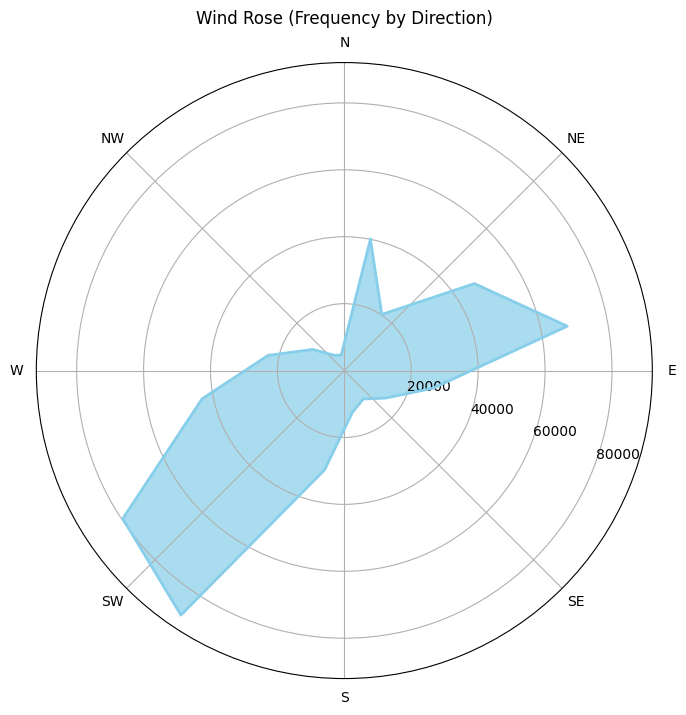

In [14]:
print("\n--- Step 7: Wind & Distribution Analysis ---")

# --- Histograms ---
print("\nGenerating Histograms for GHI and WS...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(dataset['GHI'], bins=30, kde=True) # Adjust bins as needed
plt.title('Distribution of GHI')
plt.xlabel('GHI (W/m^2)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(dataset['WS'], bins=20, kde=True) # Adjust bins as needed
plt.title('Distribution of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# --- Wind Rose or Radial Bar Plot (Simplified) ---
print("\nGenerating Simplified Wind Rose (Frequency by Direction)...")
if 'WD' in dataset.columns and 'WS' in dataset.columns:
    # Ensure WD is within 0-360 range and handle potential NaNs
    dataset_wind = dataset[['WD', 'WS']].dropna().copy()
    dataset_wind['WD'] = dataset_wind['WD'] % 360 # Ensure it wraps correctly

    # Define bins for wind direction (e.g., 16 bins for 22.5 degrees each)
    bins = np.arange(0, 360.1, 22.5) # 0 to 360, inclusive
    labels = [f'{i}-{i+22.4}' for i in bins[:-1]]
    # Handle the circular nature by custom binning if necessary, or use a smaller range for labels
    # For a simple representation, let's use standard direction labels
    direction_labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
                        'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']

    # Map WD to categorical bins
    # pd.cut defaults to right=True, meaning (a,b] for bins. To handle 0 correctly for N,
    # we might need to adjust or manually assign. For simplicity, we'll use a larger bin range initially.
    dataset_wind['WD_bin_idx'] = pd.cut(dataset_wind['WD'], bins=bins, labels=False, include_lowest=True, right=False)

    # If you want proper labels, you'd manually map bin_idx to `direction_labels`
    # For `projection='polar'`, usually using degrees directly or angular bins is fine.
    # Let's count frequency per bin
    wind_direction_counts = dataset_wind['WD_bin_idx'].value_counts().sort_index()

    # If some bins are empty, add them with 0 count to ensure consistent angle mapping
    all_bins_idx = np.arange(len(bins) - 1)
    wind_direction_counts = wind_direction_counts.reindex(all_bins_idx, fill_value=0)

    # Convert bin indices to angles for plotting (center of bin)
    angles = np.radians(bins[:-1] + (bins[1] - bins[0]) / 2)

    # Adjust angles for plotting (0 degrees at top, clockwise)
    # matplotlib polar plot is counter-clockwise by default, 0 at right.
    # We want 0 (North) at top, clockwise. So shift by pi/2 and reverse direction.
    angles_for_plot = np.concatenate([angles, [angles[0] + 2 * np.pi]]) # Close the loop for plotting
    counts_for_plot = np.concatenate([wind_direction_counts.values, [wind_direction_counts.values[0]]]) # Close the loop

    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, projection='polar')

    # Plot bars
    ax.plot(angles_for_plot, counts_for_plot, linewidth=2, color='skyblue') # Line plot for a "rose" effect
    ax.fill(angles_for_plot, counts_for_plot, color='skyblue', alpha=0.7) # Fill for a "radial bar" feel

    # Set theta direction to clockwise
    ax.set_theta_direction(-1) # Clockwise
    ax.set_theta_zero_location("N") # North at the top

    # Set the labels for the angles (directions)
    ax.set_xticks(np.radians(np.arange(0, 360, 45))) # Every 45 degrees
    ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

    # Set the r-axis (radial axis) limits and labels
    ax.set_rlabel_position(110) # Adjust label position
    plt.title('Wind Rose (Frequency by Direction)', va='bottom')
    plt.show()

else:
    print("Columns 'WD' or 'WS' not found in dataset. Skipping Wind Rose analysis.")


--- Step 8: Temperature Analysis ---


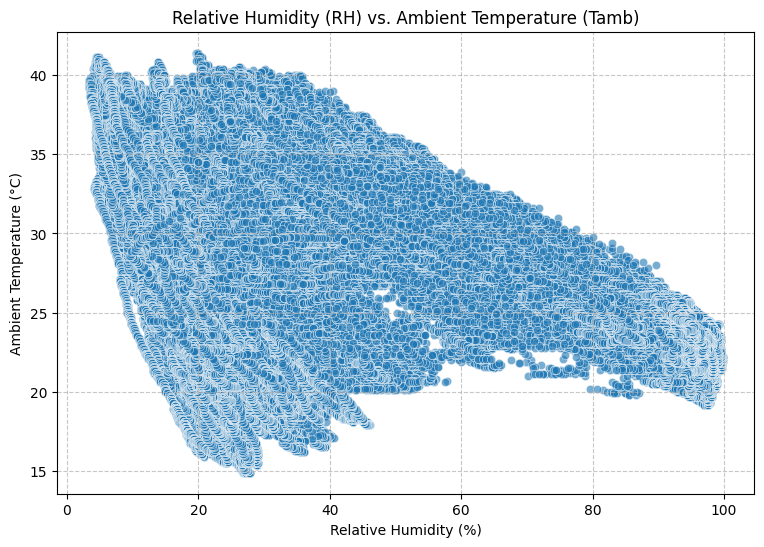

C:\Users\Admin\Documents\projects.kaim\Solar-Challenge-Week-1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


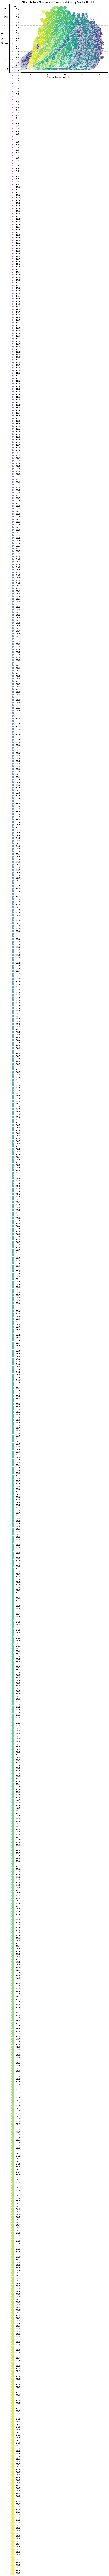

In [15]:
print("\n--- Step 8: Temperature Analysis ---")

# Scatter plot: Relative Humidity (RH) vs. Ambient Temperature (Tamb)
plt.figure(figsize=(9, 6))
sns.scatterplot(x='RH', y='Tamb', data=dataset, alpha=0.6)
plt.title('Relative Humidity (RH) vs. Ambient Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Scatter plot: Ambient Temperature (Tamb) vs. GHI, with points colored by Relative Humidity (RH)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Tamb', y='GHI', hue='RH', data=dataset,
                palette='viridis', size='RH', sizes=(20, 400),
                alpha=0.7, legend='full')
plt.title('GHI vs. Ambient Temperature, Colored and Sized by Relative Humidity')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m^2)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


--- Step 9: Bubble Chart ---


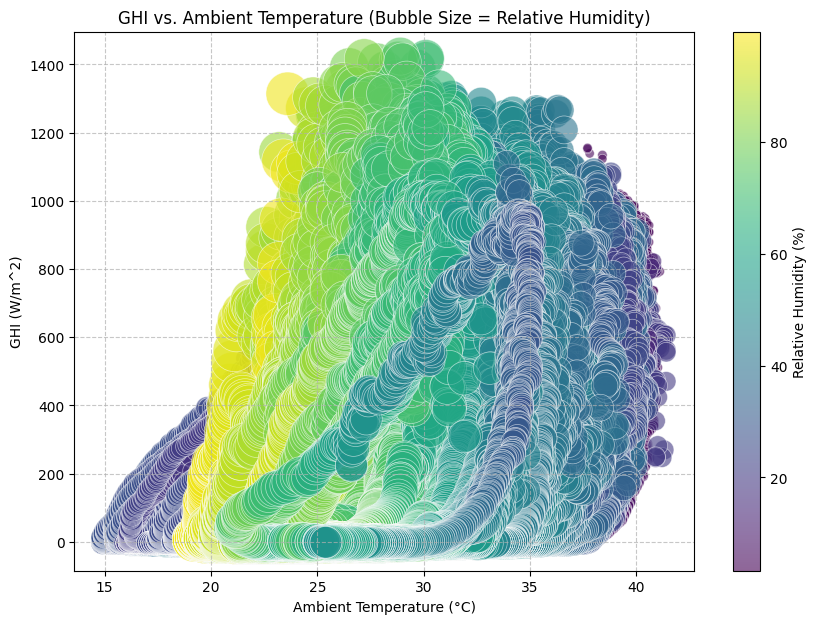

Generating Bubble Chart with Barometric Pressure (BP)...


In [ ]:
print("\n--- Step 9: Bubble Chart ---")

# Bubble Chart 1: GHI vs. Tamb with bubble size = RH
plt.figure(figsize=(10, 7))
# Adjust 'rh_scaling_factor' to make bubbles visible and distinct based on your data's RH range
rh_scaling_factor = 10
plt.scatter(x=dataset['Tamb'], y=dataset['GHI'],
            s=dataset['RH'] * rh_scaling_factor,
            c=dataset['RH'], cmap='viridis',
            alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('GHI vs. Ambient Temperature (Bubble Size = Relative Humidity)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m^2)')
cbar = plt.colorbar()
cbar.set_label('Relative Humidity (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Bubble Chart 2: GHI vs. Tamb with bubble size = BP (if 'BP' column exists)
if 'BP' in dataset.columns:
    print("Generating Bubble Chart with Barometric Pressure (BP)...")
    # Adjust 'bp_scaling_factor' based on your data's BP range
    bp_scaling_factor = 0.1
    plt.figure(figsize=(10, 7))
    plt.scatter(x=dataset['Tamb'], y=dataset['GHI'],
                s=dataset['BP'] * bp_scaling_factor,
                c=dataset['BP'], cmap='plasma',
                alpha=0.6, edgecolors='w', linewidth=0.5)
    plt.title('GHI vs. Ambient Temperature (Bubble Size = Barometric Pressure)')
    plt.xlabel('Ambient Temperature (°C)')
    plt.ylabel('GHI (W/m^2)')
    cbar_bp = plt.colorbar()
    cbar_bp.set_label('Barometric Pressure (hPa)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("The 'BP' (Barometric Pressure) column was not found in the dataset. Skipping BP bubble chart.")